# Exploratory Data Analysis Code: Spotify Tracks

## Created By: Briana Johnson & Jasmine Armster
Source from: https://www.kaggle.com/datasets/nimishasen27/spotify-dataset?resource=download

In [2]:
import pandas as pd
#python.exe -m pip install --upgrade pip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\jbria\OneDrive - Old Dominion University\Fall 2025\Data Visualization C625\cs625-fall-2025\staging-c625-repo\staging-c625-repo\tracks.csv")

print(df.shape)
df.head

(586672, 20)


<bound method NDFrame.head of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903        

In [4]:
pip install pandasql


Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandasql import sqldf

In [6]:
pysqldf = lambda q: sqldf(q, globals())

In [7]:
query = "SELECT name, popularity, explicit, artists, release_date, danceability, energy, loudness FROM df WHERE popularity >= 75"
result = pysqldf(query)
print(result.head())

                         name  popularity  explicit            artists  \
0             Johnny B. Goode          77         0    ['Chuck Berry']   
1                     At Last          77         0     ['Etta James']   
2  Can't Help Falling in Love          79         0  ['Elvis Presley']   
3                 Stand by Me          79         0    ['Ben E. King']   
4            Oh, Pretty Woman          75         0    ['Roy Orbison']   

  release_date  danceability  energy  loudness  
0   1959-07-01         0.534   0.803    -9.129  
1         1960         0.274   0.348    -8.631  
2   1961-10-20         0.396   0.293   -14.062  
3   1962-08-20         0.650   0.306    -9.443  
4         1962         0.619   0.603    -9.481  


## Scatter Plot

In [8]:
top_artists = df.groupby("artists")["popularity"].mean().nlargest(50).index
top_artists_df = df[df["artists"].isin(top_artists)]

C:\Users\jbria\AppData\Local\Temp\ipykernel_4820\3947318866.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 800x800 with 0 Axes>

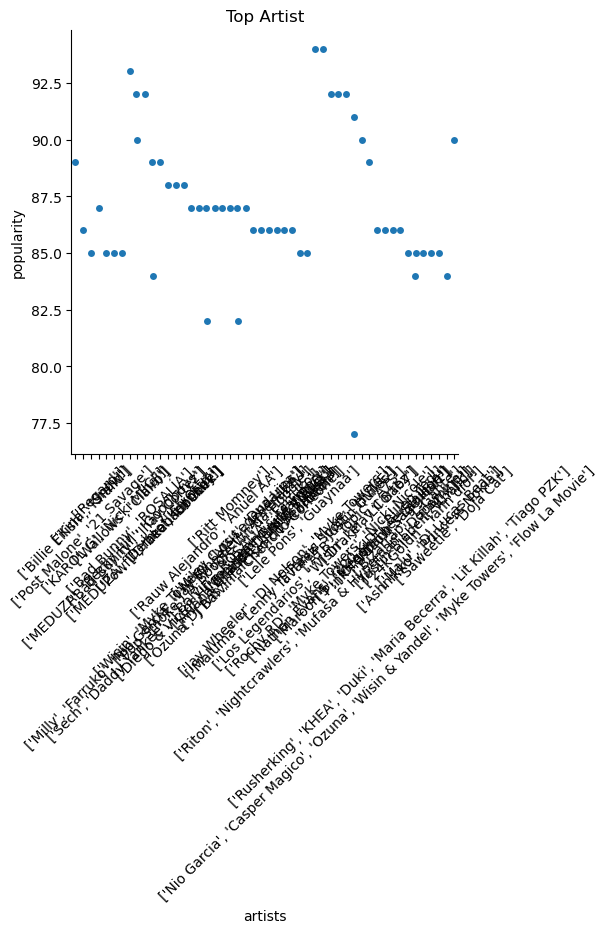

In [9]:
#Scatter Plot Artist vs Popularity
plt.figure(figsize=(8, 8))
sns.catplot(data=top_artists_df, x="artists", y="popularity")
plt.title("Top Artist")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Top_Artist_Popularity.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
top_danceability = df.groupby("danceability")["popularity"].mean().nlargest(20).index
top_danceability_df = df[df["danceability"].isin(top_danceability)]

<Figure size 800x800 with 0 Axes>

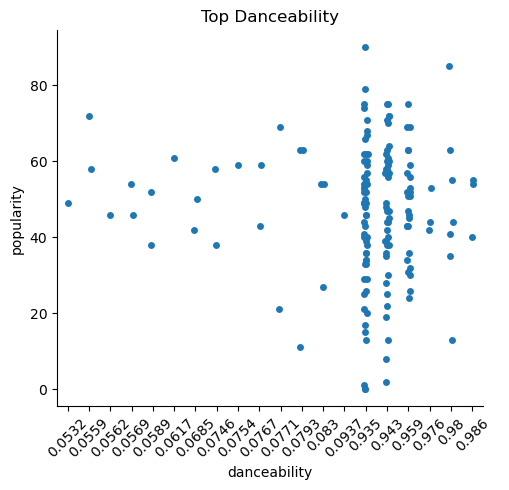

In [11]:
#Scatter Plot Danceability vs Popularity
plt.figure(figsize=(8, 8))
sns.catplot(data=top_danceability_df, x="danceability", y="popularity")
plt.title("Top Danceability")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Top_Danceability_Popularity.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

In [12]:
top_explicit = df.groupby("explicit")["popularity"].mean().nlargest(20).index
top_explicit_df = df[df["explicit"].isin(top_explicit)]

<Figure size 1400x1000 with 0 Axes>

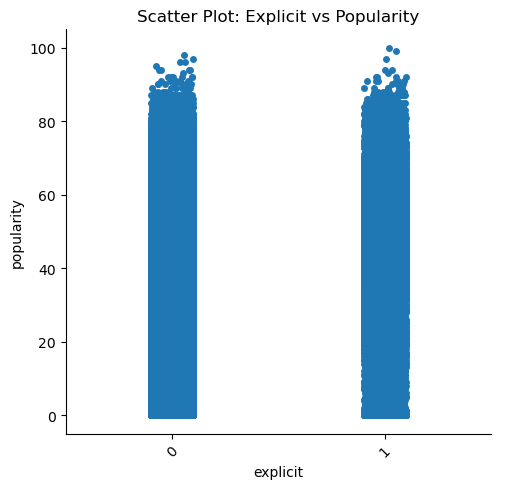

In [13]:
#Scatter Plot Explicit vs Popularity
plt.figure(figsize=(14, 10))
sns.catplot(data=top_explicit_df, x="explicit", y="popularity")
plt.title("Scatter Plot: Explicit vs Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Explicit_vs_Popularity.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 800x800 with 0 Axes>

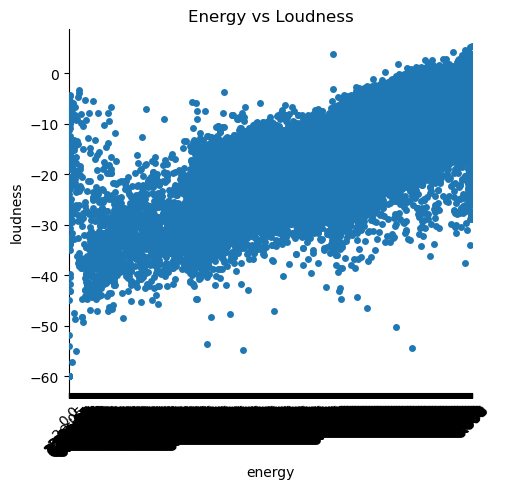

In [14]:
#Scatter Plot Energy vs Loudness
plt.figure(figsize=(8, 8))
sns.catplot(data=top_explicit_df, x="energy", y="loudness")
plt.title("Energy vs Loudness")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Scatter_Plot_Energy_vs_Loudness.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

## Box Plots

<Figure size 1400x1000 with 0 Axes>

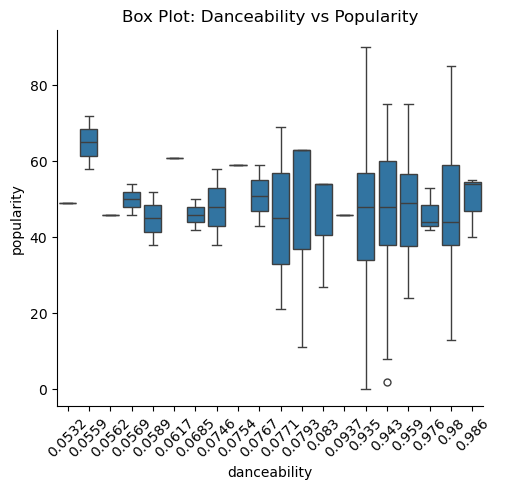

In [15]:
#Box Plot Danceability vs Popularity 
plt.figure(figsize=(14, 10))
sns.catplot(data=top_danceability_df, x="danceability", y="popularity", kind="box")
plt.title("Box Plot: Danceability vs Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Box_Danceability_vs_Popularity.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 1400x1000 with 0 Axes>

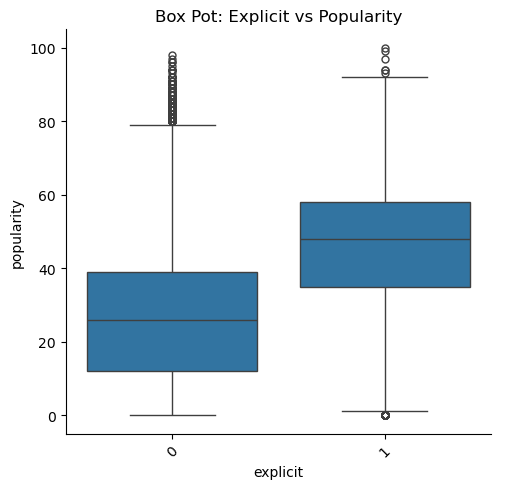

In [16]:
#Box Pot Explicit vs Popularity
plt.figure(figsize=(14, 10))
sns.catplot(data=top_explicit_df, x="explicit", y="popularity", kind="box")
plt.title("Box Pot: Explicit vs Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Box_Explicit_vs_Popularity.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

## Violin Plot

In [17]:
top_release_date = df.groupby("release_date")["danceability"].mean().nlargest(20).index
top_release_date_df = df[df["release_date"].isin(top_release_date)]

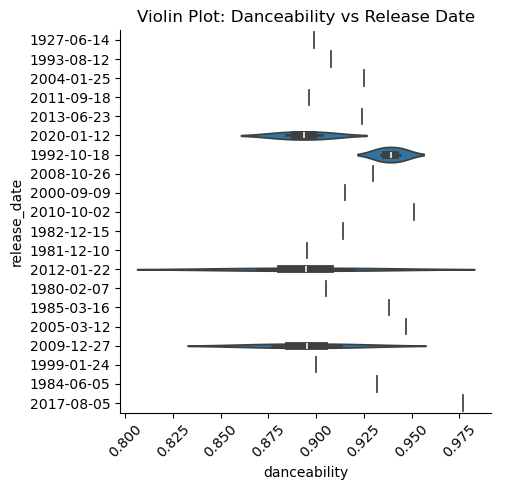

In [18]:
#Violin Plot Danceability vs Release Date
sns.catplot(
    data=top_release_date_df, x="danceability", y="release_date", kind="violin",
)
plt.title("Violin Plot: Danceability vs Release Date")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Violin_Danceability_vs_ReleaseDate.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

In [19]:
top_explicit = df.groupby("energy")["loudness"].mean().nlargest(20).index
top_explicit_df = df[df["energy"].isin(top_explicit)]

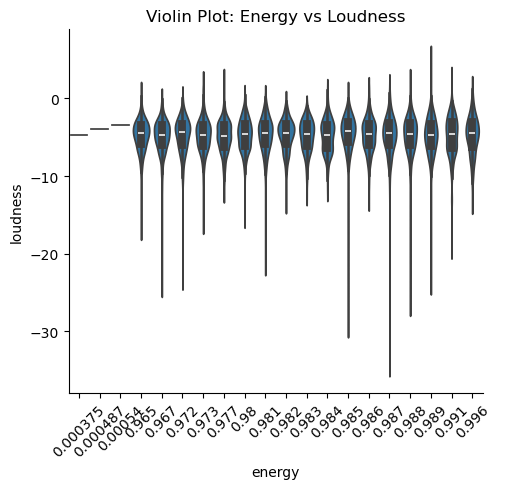

In [21]:
#Violin Plot Energy vs Loudness
sns.catplot(
    data=top_explicit_df, x="energy", y="loudness", kind="violin",
)
plt.title("Violin Plot: Energy vs Loudness")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Violin_Energy_vs_Loudness.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

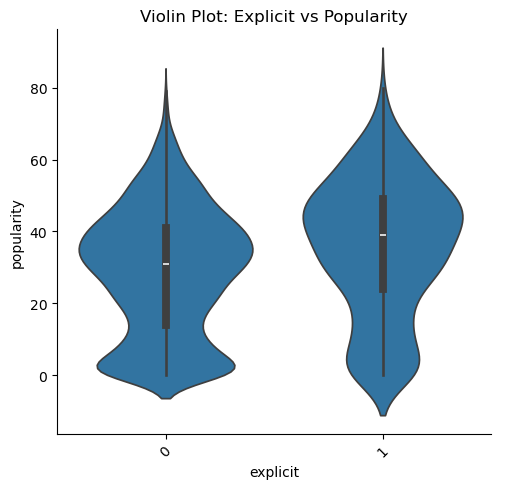

In [22]:
df["explicit_label"] = df["explicit"].map({0: "Not Explicit", 1: "Explicit"})

sns.catplot(
    data=top_explicit_df, x="explicit", y="popularity",
    kind="violin",
)
plt.title("Violin Plot: Explicit vs Popularity")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("Spotify/Violin_Explicit_vs_Popularity.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

In [23]:
# Univariate Analysis – Categorical variables.: Box plot and Scatter Plot Done
# Univariate Analysis – Continuous Variables. Violin Done
#Bivariate Analysis - Scatter Plot. Done 
#Data Skew / Class imbalance.
#Linearity vs non-linearity between features. 

## Additional Analysis of Numeric Fields


 Summary statistics for 'danceability':
Mean: 0.56
Median: 0.58
Min: 0.00
Max: 0.99
Standard Deviation: 0.17


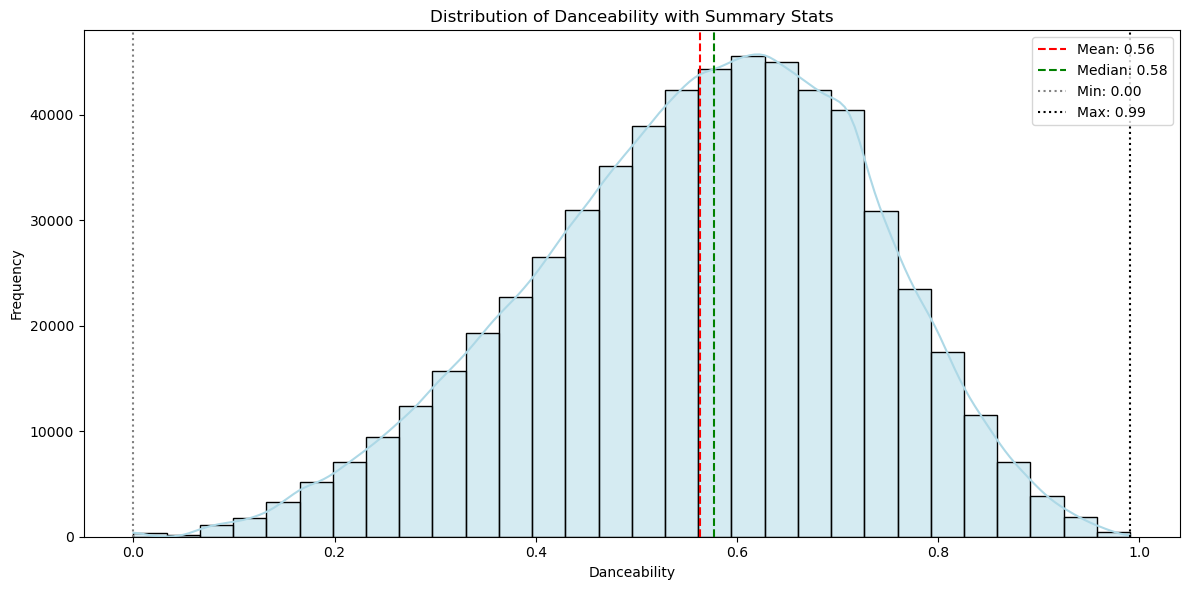


 Summary statistics for 'popularity':
Mean: 27.57
Median: 27.00
Min: 0.00
Max: 100.00
Standard Deviation: 18.37


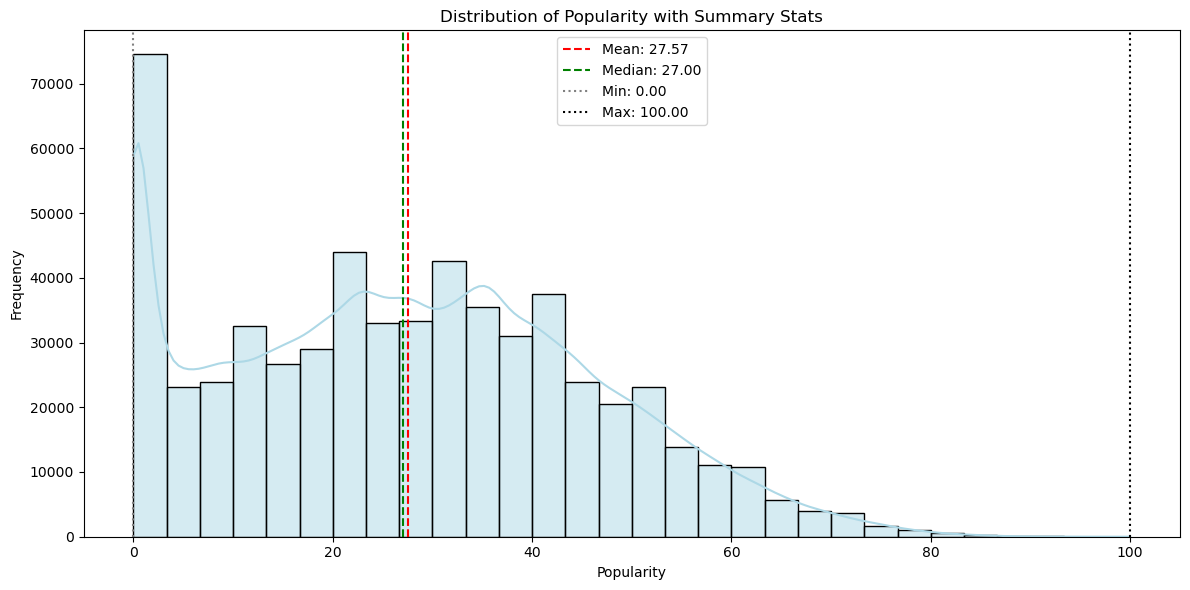


 Summary statistics for 'energy':
Mean: 0.54
Median: 0.55
Min: 0.00
Max: 1.00
Standard Deviation: 0.25


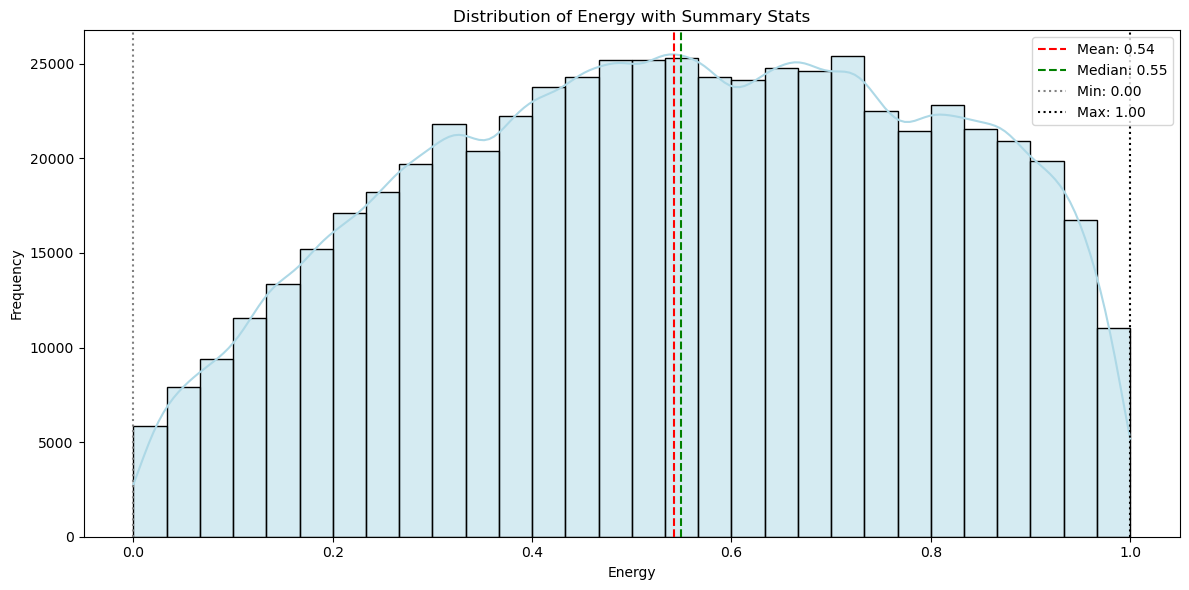


 Summary statistics for 'duration_ms':
Mean: 230051.17
Median: 214893.00
Min: 3344.00
Max: 5621218.00
Standard Deviation: 126526.09


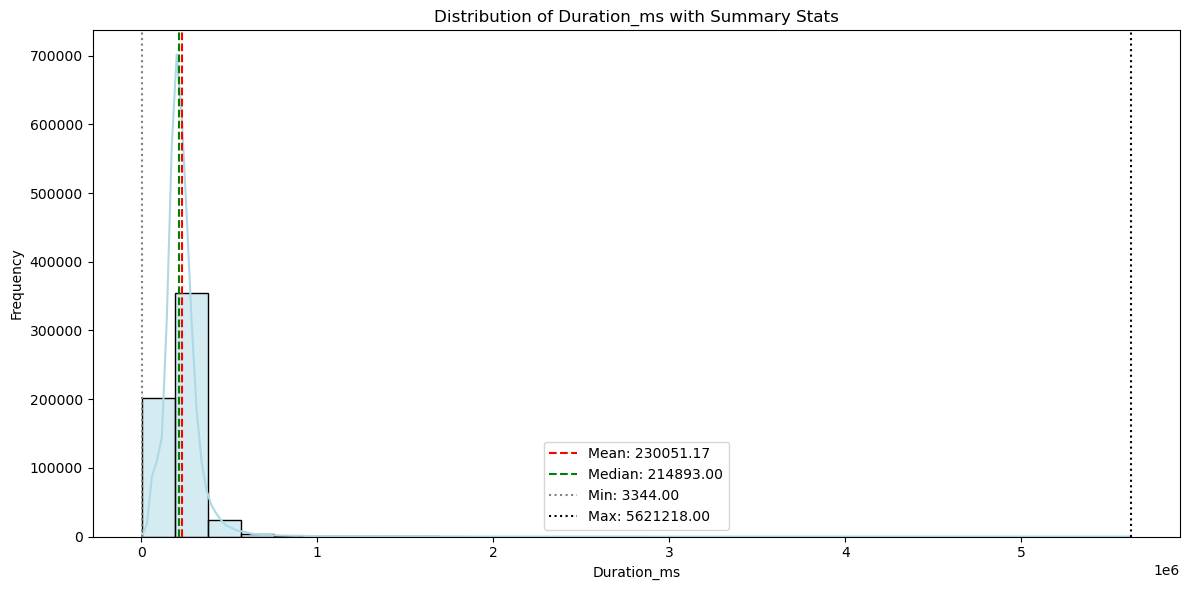

In [24]:
# Danceability, energy, pop, duration
#mean, median, min, max, standard deviation

columns = ['danceability', 'popularity', 'energy', 'duration_ms']  
for col in columns:
    # Drop NA values for the column
    series = pd.to_numeric(df[col], errors='coerce').dropna()

    # Calculateed stats
    mean = series.mean()
    median = series.median()
    std_dev = series.std()
    col_min = series.min()
    col_max = series.max()

    # Printed summary
    print(f"\n Summary statistics for '{col}':")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Min: {col_min:.2f}")
    print(f"Max: {col_max:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")

    # Plot
    plt.figure(figsize=(12, 6))
    sns.histplot(series, bins=30, kde=True, color='lightblue')

    plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='green', linestyle='--', label=f"Median: {median:.2f}")
    plt.axvline(col_min, color='gray', linestyle=':', label=f"Min: {col_min:.2f}")
    plt.axvline(col_max, color='black', linestyle=':', label=f"Max: {col_max:.2f}")

    plt.title(f"Distribution of {col.capitalize()} with Summary Stats")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

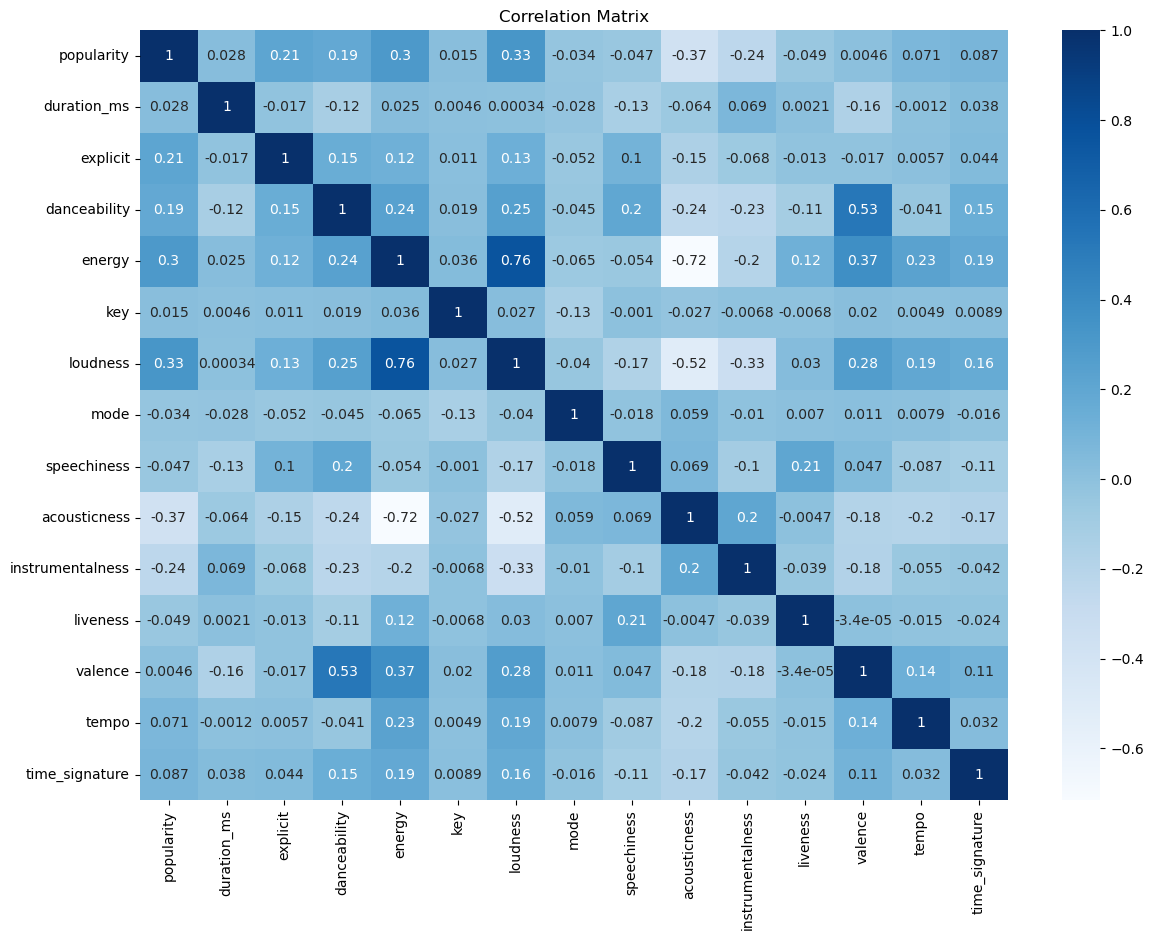

In [27]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
#plt.savefig("Spotify/CorrelationMatrix.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()
